<a href="https://colab.research.google.com/github/YuryGlazcov/BasicPy/blob/main/%D0%9F%D0%BE%D1%87%D1%82%D0%B0%D0%BB%D1%8C%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данная задача является типичной задачей коммивояжера. Для нее есть несколько алгоритмов для решения. Я выбрал метод ближайших соседей за его простую логику.
Признаю,что, возможно, я не нашел самый короткий путь .

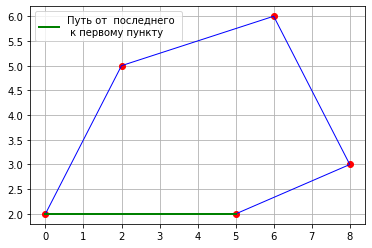

 1. (0, 2)  -> 
2. (2, 5) [3.605551275463989] -> 
3. (6, 6) [7.728656901081649] -> 
4. (8, 3)[11.334208176545639] ->
5. (5, 2)[14.496485836714019] -> 
6. (0, 2) [19.49648583671402] = 
 [19.49648583671402].


In [53]:
import numpy
# Создаем список координат используемых в задаче  и далее разбиваем их на списки x и y координат
coords_list = [(0, 2), (2, 5), (5, 2), (6, 6), (8, 3)]
coords_list_x =[]
coords_list_y = [ ]
for i in np.arange(0,5,1):
         coords_list_x.append(coords_list[i][0])
         coords_list_y.append(coords_list[i][1])

#Создаем матрицу расстояний между пунктами
M = np.zeros([5,5]) # Шаблон матрицы относительных расстояний между пунктами
for i in np.arange(0,5,1):
         for j in np.arange(0,5,1):
                  if i!=j:
                           M[i,j]=sqrt((coords_list_x[i]-coords_list_x[j])**2+(coords_list_y[i]-coords_list_y[j])**2)# Заполнение матрицы
                  else:
                           M[i,j]=float('inf')#Заполнение главной диагонали матрицы   

way= []
ib = coords_list_x[0]
way.append(ib)
for i in np.arange(1,5,1):
         s=[]
         for j in np.arange(0,5,1):                  
                  s.append(M[way[i-1],j])
         way.append(s.index(min(s)))# Индексы пунктов ближайших городов соседей
         for j in np.arange(0,i,1):  # Убираем дубликаты расстояний в матрице чтобы в дальнейшем вычислить весь путь
                  M[way[i],way[j]]=float('inf')
S=sum([sqrt((coords_list_x[way[i]]-coords_list_x[way[i+1]])**2+(coords_list_y[way[i]]-coords_list_y[way[i+1]])**2)for i in np.arange(0,5-1,1)]) +sqrt((coords_list_x[way[n-1]]-coords_list_x[way[0]])**2+(coords_list_y[way[5-1]]-coords_list_y[way[0]])**2)                      
#S - итоговая величина наикратчайшего пути методом ближайших соседей
X1=[coords_list_x[way[i]] for i in np.arange(0,5,1)]
Y1=[coords_list_y[way[i]] for i in np.arange(0,5,1)]    
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1)   
X2=[coords_list_x[way[5-1]],coords_list_x[way[0]]]
Y2=[coords_list_y[way[5-1]],coords_list_y[way[0]]]
plt.plot(X2, Y2, color='g', linewidth=2,  linestyle='-', label='Путь от  последнего \n к первому пункту') 
plt.legend(loc='best')
plt.grid(True)
plt.show() 
print (f""" 1. {coords_list[way[0]]}  -> 
2. {coords_list[way[1]]} [{M[way[0],way[1]]}] -> 
3. {coords_list[way[2]]} [{M[way[0],way[1]]+M[way[1],way[2]]}] -> 
4. {coords_list[way[3]]}[{M[way[0],way[1]]+M[way[1],way[2]]+M[way[2],way[3]]}] ->
5. {coords_list[way[4]]}[{M[way[0],way[1]]+M[way[1],way[2]]+M[way[2],way[3]]+M[way[3],way[4]]}] -> 
6. {coords_list[way[0]]} [{M[way[0],way[1]]+M[way[1],way[2]]+M[way[2],way[3]]+M[way[3],way[4]]+ M[way[0],way[4]]}] = 
 [{S}].""") 
#print в данном случае выполняет функцию проверки вычислений и также  является выводом итогов